# Conversion of docs to excel file

In [3]:
import os
import json
from docx import Document
import pandas as pd


folder_path = r"C:\Users\itsam\Downloads\ML-Proj-Dataset\ML-Proj-Dataset\Test"


output_folder = os.path.join(folder_path, "Tested")
os.makedirs(output_folder, exist_ok=True) 


for filename in os.listdir(folder_path):
    if filename.endswith(".docx"):
        file_path = os.path.join(folder_path, filename)
        doc = Document(file_path)

       
        full_text = "\n".join([para.text for para in doc.paragraphs]).strip()

        try:
           
            data = json.loads(full_text)

            if isinstance(data, list):
               
                df = pd.json_normalize(data)
                output_file = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}.xlsx")
                df.to_excel(output_file, index=False)
        except json.JSONDecodeError:
            print(f"Could not parse JSON in file: {filename}")

print(f"Excel files have been saved in the folder: {output_folder}")


Excel files have been saved in the folder: C:\Users\itsam\Downloads\ML-Proj-Dataset\ML-Proj-Dataset\Test\Tested


In [5]:
import os
import json
from docx import Document
import pandas as pd
folder_path = r"C:\Users\itsam\Downloads\ML-Proj-Dataset\ML-Proj-Dataset\Train"


output_folder = os.path.join(folder_path, "Trained")
os.makedirs(output_folder, exist_ok=True) 
for filename in os.listdir(folder_path):
    if filename.endswith(".docx"):
        file_path = os.path.join(folder_path, filename)
        doc = Document(file_path)
        full_text = "\n".join([para.text for para in doc.paragraphs]).strip()

        try:
          
            data = json.loads(full_text)
            if isinstance(data, list):
                df = pd.json_normalize(data)
                output_file = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}.xlsx")
                df.to_excel(output_file, index=False)

        except json.JSONDecodeError:
            print(f"Could not parse JSON in file: {filename}")

print(f"Excel files have been saved in the folder: {output_folder}")


# conversion of unstructured to structred data

In [150]:
import os
import pandas as pd


folder_path = r"C:\Users\itsam\Downloads\ML-Proj-Dataset\ML-Proj-Dataset\Weather"


output_folder = os.path.join(folder_path, 'weth')
if not os.path.exists(output_folder):
    os.makedirs(output_folder)


for i, filename in enumerate(os.listdir(folder_path)):
    if filename.endswith('.xlsx'): 
        file_path = os.path.join(folder_path, filename)
        
       
        xls = pd.ExcelFile(file_path)
        df = pd.read_excel(xls, 'Sheet1', header=None)
        second_row = df.iloc[1]
        date_values = second_row[0].split()  
        date_df = pd.DataFrame(date_values[1:], columns=['Date']) 
        date_df['Date'] = pd.to_datetime(date_values[0] + ' ' + date_df['Date'] + (' 2023' if i < 6 else ' 2024')).dt.strftime('%Y-%m-%d')
        temperature_data = second_row[1].split()[3:]
        dew_point_data = second_row[2].split()[3:]
        humidity = second_row[3].split()[3:]
        wind = second_row[4].split()[3:]
        pressure = second_row[5].split()[3:]
        precipitation = second_row[6].split()[1:]
        
        date_df['Min Temperature'] = temperature_data[2::3]
        date_df['Max Temperature'] = temperature_data[0::3]
        date_df['Average Temperature'] = temperature_data[1::3]
        
        date_df['Min Dew Point'] = dew_point_data[2::3]
        date_df['Max Dew Point'] = dew_point_data[0::3]
        date_df['Average Dew Point'] = dew_point_data[1::3]
        
        date_df['Min humidity'] = humidity[2::3]
        date_df['Max humidity'] = humidity[0::3]
        date_df['Average humidity'] = humidity[1::3]
        
        date_df['Min wind'] = wind[2::3]
        date_df['Max wind'] = wind[0::3]
        date_df['Average wind'] = wind[1::3]
        
        date_df['Min pressure'] = pressure[2::3]
        date_df['Max pressure'] = pressure[0::3]
        date_df['Average pressure'] = pressure[1::3]
        
        date_df['precipitation'] = precipitation
        
       
        output_file_path = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}_processed.xlsx")
        date_df.to_excel(output_file_path, index=False)


# saving to excel file

In [152]:


weth_folder_path = r"C:\Users\itsam\Downloads\ML-Proj-Dataset\ML-Proj-Dataset\weth"


data_frames = []


for filename in os.listdir(weth_folder_path):
    if filename.endswith('.xlsx'): 
        file_path = os.path.join(weth_folder_path, filename)
     
        df = pd.read_excel(file_path)
      
        data_frames.append(df)


combined_df = pd.concat(data_frames, ignore_index=True)
combined_file_path = os.path.join(weth_folder_path, 'combined_weather_data.xlsx')
combined_df.to_excel(combined_file_path, index=False)


In [118]:

weth_folder_path = r"C:\Users\itsam\Downloads\ML-Proj-Dataset\ML-Proj-Dataset\Trained"

data_frames = []


for filename in os.listdir(weth_folder_path):
    if filename.endswith('.xlsx'):  
        file_path = os.path.join(weth_folder_path, filename)
        df = pd.read_excel(file_path)
        data_frames.append(df)


combined_df = pd.concat(data_frames, ignore_index=True)
combined_file_path = os.path.join(weth_folder_path, 'combined_trained.xlsx')
combined_df.to_excel(combined_file_path, index=False)


In [119]:

weth_folder_path = r"C:\Users\itsam\Downloads\ML-Proj-Dataset\ML-Proj-Dataset\Tested"
data_frames = []

for filename in os.listdir(weth_folder_path):
    if filename.endswith('.xlsx'): 
        file_path = os.path.join(weth_folder_path, filename)

        df = pd.read_excel(file_path)

        data_frames.append(df)


combined_df = pd.concat(data_frames, ignore_index=True)
combined_file_path = os.path.join(weth_folder_path, 'combined_tested.xlsx')
combined_df.to_excel(combined_file_path, index=False)

# combined test file loaded

In [159]:
folder_path = r"C:\Users\itsam\Downloads\ML-Proj-Dataset\ML-Proj-Dataset\combined_tested.xlsx"
df=pd.read_excel(folder_path)
df=pd.DataFrame(df)
df

type   status departure.iataCode departure.icaoCode  \
0      departure   active                lhe               opla   
1      departure   active                lhe               opla   
2      departure   active                lhe               opla   
3      departure  unknown                lhe               opla   
4      departure   active                lhe               opla   
...          ...      ...                ...                ...   
14905  departure   active                lhe               opla   
14906  departure   active                lhe               opla   
14907  departure   active                lhe               opla   
14908  departure   active                lhe               opla   
14909  departure   active                lhe               opla   

       departure.scheduledTime departure.estimatedRunway  \
0      2023-07-17t20:35:00.000   2023-07-17t20:46:00.000   
1      2023-07-27t08:00:00.000                       NaN   
2      2023-07-27t08:00:00.000                       NaN   
3      2023-07-28t16:45:00.000                       NaN   
4      2023-07-19t04:15:00.000   2023-07-19t04:18:00.000   
...                        ...                       ...   
14905  2023-11-23t23:15:00.000   2023-11-23t23:27:00.000   
14906  2023-11-25t18:45:00.000   2023-11-25t19:05:00.000   
14907  2023-11-25t02:55:00.000   2023-11-25t03:07:00.000   
14908  2023-11-27t08:35:00.000                       NaN   
14909  2023-11-26t01:45:00.000                       NaN   

        departure.actualRunway arrival.iataCode arrival.icaoCode  \
0      2023-07-17t20:46:00.000              khi             opkc   
1                          NaN              ruh             oerk   
2                          NaN              dxb             omdb   
3                          NaN              jed             oejn   
4      2023-07-19t04:18:00.000              auh             omaa   
...                        ...              ...              ...   
14905  2023-11-23t23:27:00.000              shj             omsj   
14906  2023-11-25t19:05:00.000              jed             oejn   
14907  2023-11-25t03:07:00.000              doh             othh   
14908                      NaN              doh             othh   
14909                      NaN              ika             oiie   

         arrival.scheduledTime  ... codeshared.airline.iataCode  \
0      2023-07-17t22:20:00.000  ...                         NaN   
1      2023-07-27t10:00:00.000  ...                         NaN   
2      2023-07-27t10:00:00.000  ...                          pk   
3      2023-07-28t20:30:00.000  ...                         NaN   
4      2023-07-19t06:35:00.000  ...                          ey   
...                        ...  ...                         ...   
14905  2023-11-24t02:05:00.000  ...                         NaN   
14906  2023-11-25t22:05:00.000  ...                         NaN   
14907  2023-11-25t05:05:00.000  ...                          qr   
14908  2023-11-27t10:45:00.000  ...                          qr   
14909  2023-11-26t04:15:00.000  ...                         NaN   

      codeshared.airline.icaoCode codeshared.flight.number  \
0                             NaN                      NaN   
1                             NaN                      NaN   
2                             pia                    203.0   
3                             NaN                      NaN   
4                             etd                    242.0   
...                           ...                      ...   
14905                         NaN                      NaN   
14906                         NaN                      NaN   
14907                         qtr                    621.0   
14908                         qtr                    629.0   
14909                         NaN                      NaN   

      codeshared.flight.iataNumber  codeshared.flight.icaoNumber  \
0                              NaN                 

# phase 1:


# droping useless columns for testing data

In [160]:
features_to_drop = [
    'departure.estimatedRunway','arrival.estimatedTime', 
    'arrival.actualTime', 'arrival.estimatedRunway', 'arrival.actualRunway', 
    'arrival.baggage', 'codeshared.airline.name', 'codeshared.airline.iataCode', 
    'codeshared.airline.icaoCode', 'codeshared.flight.number', 
    'codeshared.flight.iataNumber', 'codeshared.flight.icaoNumber',
    'departure.gate', 'arrival.gate', 'departure.terminal', 'arrival.terminal',
    'flight.iataNumber', 'flight.icaoNumber','airline.name','airline.icaoCode',
    'airline.iataCode','airline.name'
    
]

df = df.drop(columns=features_to_drop)
df


type   status departure.iataCode departure.icaoCode  \
0      departure   active                lhe               opla   
1      departure   active                lhe               opla   
2      departure   active                lhe               opla   
3      departure  unknown                lhe               opla   
4      departure   active                lhe               opla   
...          ...      ...                ...                ...   
14905  departure   active                lhe               opla   
14906  departure   active                lhe               opla   
14907  departure   active                lhe               opla   
14908  departure   active                lhe               opla   
14909  departure   active                lhe               opla   

       departure.scheduledTime   departure.actualRunway arrival.iataCode  \
0      2023-07-17t20:35:00.000  2023-07-17t20:46:00.000              khi   
1      2023-07-27t08:00:00.000                      NaN              ruh   
2      2023-07-27t08:00:00.000                      NaN              dxb   
3      2023-07-28t16:45:00.000                      NaN              jed   
4      2023-07-19t04:15:00.000  2023-07-19t04:18:00.000              auh   
...                        ...                      ...              ...   
14905  2023-11-23t23:15:00.000  2023-11-23t23:27:00.000              shj   
14906  2023-11-25t18:45:00.000  2023-11-25t19:05:00.000              jed   
14907  2023-11-25t02:55:00.000  2023-11-25t03:07:00.000              doh   
14908  2023-11-27t08:35:00.000                      NaN              doh   
14909  2023-11-26t01:45:00.000                      NaN              ika   

      arrival.icaoCode    arrival.scheduledTime  flight.number  
0                 opkc  2023-07-17t22:20:00.000            847  
1                 oerk  2023-07-27t10:00:00.000            725  
2                 omdb  2023-07-27t10:00:00.000           4359  
3                 oejn  2023-07-28t20:30:00.000            470  
4                 omaa  2023-07-19t06:35:00.000           3932  
...                ...                      ...            ...  
14905             omsj  2023-11-24t02:05:00.000            412  
14906             oejn  2023-11-25t22:05:00.000            859  
14907             othh  2023-11-25t05:05:00.000           6187  
14908             othh  2023-11-27t10:45:00.000           6032  
14909             oiie  2023-11-26t04:15:00.000           1194  

[14910 rows x 10 columns]

# filling nan values with forward fill method for testing data

In [161]:
nan_count_before = df.isna().sum()
df = df.fillna(method='ffill')
nan_count_after = df.isna().sum()
nan_count_before, nan_count_after

(type                          0
 status                        0
 departure.iataCode            0
 departure.icaoCode            0
 departure.scheduledTime       0
 departure.actualRunway     6215
 arrival.iataCode              0
 arrival.icaoCode              0
 arrival.scheduledTime         0
 flight.number                 0
 dtype: int64,
 type                       0
 status                     0
 departure.iataCode         0
 departure.icaoCode         0
 departure.scheduledTime    0
 departure.actualRunway     0
 arrival.iataCode           0
 arrival.icaoCode           0
 arrival.scheduledTime      0
 flight.number              0
 dtype: int64)

# conversion to date time format and extract delay colum for testingg data 

In [162]:
df['departure.actualRunway'] = pd.to_datetime(df['departure.actualRunway'])
df['arrival.scheduledTime'] = pd.to_datetime(df['arrival.scheduledTime'])
df['departure.scheduledTime'] = pd.to_datetime(df['departure.scheduledTime'])

df['departure_delay'] = (df['departure.actualRunway'] - df['departure.scheduledTime']).dt.total_seconds() / 60

df['departure.scheduledDate'] = df['departure.scheduledTime'].dt.date
df

type   status departure.iataCode departure.icaoCode  \
0      departure   active                lhe               opla   
1      departure   active                lhe               opla   
2      departure   active                lhe               opla   
3      departure  unknown                lhe               opla   
4      departure   active                lhe               opla   
...          ...      ...                ...                ...   
14905  departure   active                lhe               opla   
14906  departure   active                lhe               opla   
14907  departure   active                lhe               opla   
14908  departure   active                lhe               opla   
14909  departure   active                lhe               opla   

      departure.scheduledTime departure.actualRunway arrival.iataCode  \
0         2023-07-17 20:35:00    2023-07-17 20:46:00              khi   
1         2023-07-27 08:00:00    2023-07-17 20:46:00              ruh   
2         2023-07-27 08:00:00    2023-07-17 20:46:00              dxb   
3         2023-07-28 16:45:00    2023-07-17 20:46:00              jed   
4         2023-07-19 04:15:00    2023-07-19 04:18:00              auh   
...                       ...                    ...              ...   
14905     2023-11-23 23:15:00    2023-11-23 23:27:00              shj   
14906     2023-11-25 18:45:00    2023-11-25 19:05:00              jed   
14907     2023-11-25 02:55:00    2023-11-25 03:07:00              doh   
14908     2023-11-27 08:35:00    2023-11-25 03:07:00              doh   
14909     2023-11-26 01:45:00    2023-11-25 03:07:00              ika   

      arrival.icaoCode arrival.scheduledTime  flight.number  departure_delay  \
0                 opkc   2023-07-17 22:20:00            847             11.0   
1                 oerk   2023-07-27 10:00:00            725         -13634.0   
2                 omdb   2023-07-27 10:00:00           4359         -13634.0   
3                 oejn   2023-07-28 20:30:00            470         -15599.0   
4                 omaa   2023-07-19 06:35:00           3932              3.0   
...                ...                   ...            ...              ...   
14905             omsj   2023-11-24 02:05:00            412             12.0   
14906             oejn   2023-11-25 22:05:00            859             20.0   
14907             othh   2023-11-25 05:05:00           6187             12.0   
14908             othh   2023-11-27 10:45:00           6032          -3208.0   
14909             oiie   2023-11-26 04:15:00           1194          -1358.0   

      departure.scheduledDate  
0                  2023-07-17  
1                  2023-07-27  
2                  2023-07-27  
3                  2023-07-28  
4                  2023-07-19  
...                       ...  
14905              2023-11-23  
14906              2023-11-25  
14907              2023-11-25  
14908              2023-11-27  
14909              2023-11-26  

[14910 rows x 12 columns]

# merge with weather data

In [163]:
folder_path = r"C:\Users\itsam\Downloads\ML-Proj-Dataset\ML-Proj-Dataset\combined_weather_data.xlsx"
df2 = pd.read_excel(folder_path)  
df2['Date'] = pd.to_datetime(df2['Date']) 
df['departure.scheduledDate'] = pd.to_datetime(df['departure.scheduledDate'])
merged_df = pd.merge(df, df2, left_on='departure.scheduledDate', right_on='Date', how='outer')
merged_df = merged_df.fillna(method='ffill')
merged_df=merged_df[:12914]
merged_df

type  status departure.iataCode departure.icaoCode  \
0      departure  active                lhe               opla   
1      departure  active                lhe               opla   
2      departure  active                lhe               opla   
3      departure  active                lhe               opla   
4      departure  active                lhe               opla   
...          ...     ...                ...                ...   
12909  departure  active                isb               opis   
12910  departure  active                isb               opis   
12911  departure  active                isb               opis   
12912  departure  active                isb               opis   
12913  departure  active                isb               opis   

      departure.scheduledTime departure.actualRunway arrival.iataCode  \
0         2023-07-17 20:35:00    2023-07-17 20:46:00              khi   
1         2023-07-17 09:55:00    2023-07-26 09:39:00              doh   
2         2023-07-17 09:55:00    2023-07-26 09:39:00              doh   
3         2023-07-17 03:30:00    2023-07-17 03:52:00              doh   
4         2023-07-17 06:00:00    2023-07-30 20:53:00              ist   
...                       ...                    ...              ...   
12909     2023-10-04 22:10:00    2023-10-04 22:13:00              doh   
12910     2023-10-04 22:10:00    2023-10-04 22:13:00              doh   
12911     2023-10-04 09:45:00    2023-10-04 09:58:00              doh   
12912     2023-10-04 15:40:00    2023-10-10 22:15:00              khi   
12913     2023-10-04 22:10:00    2023-10-04 22:13:00              doh   

      arrival.icaoCode arrival.scheduledTime  flight.number  ...  \
0                 opkc   2023-07-17 22:20:00          847.0  ...   
1                 othh   2023-07-17 11:55:00          629.0  ...   
2                 othh   2023-07-17 11:55:00         3836.0  ...   
3                 othh   2023-07-17 05:30:00         7913.0  ...   
4                 ltfm   2023-07-17 10:45:00          715.0  ...   
...                ...                   ...            ...  ...   
12909             othh   2023-10-04 23:50:00         6379.0  ...   
12910             othh   2023-10-04 23:50:00         6413.0  ...   
12911             othh   2023-10-04 11:25:00         6028.0  ...   
12912             opkc   2023-10-04 17:40:00          673.0  ...   
12913             othh   2023-10-04 23:50:00         8127.0  ...   

       Min humidity Max humidity Average humidity  Min wind  Max wind  \
0              59.0         89.0             71.3       0.0      12.0   
1              59.0         89.0             71.3       0.0      12.0   
2              59.0         89.0             71.3       0.0      12.0   
3              59.0         89.0             71.3       0.0      12.0   
4              59.0         89.0             71.3       0.0      12.0   
...             ...          ...              ...       ...       ...   
12909          55.0        100.0             72.1       0.0      52.0   
12910          55.0        100.0             72.1       0.0      52.0   
12911          55.0        100.0             72.1       0.0      52.0   
12912          55.0        100.0             72.1       0.0      52.0   
12913          55.0        100.0             72.1       0.0      52.0   

       Average wind  Min pressure  Max pressure  Average pressure  \
0               6.9          28.7          28.8              28.8   
1               6.9          28.7          28.8              28.8   
2               6.9          28.7          28.8              28.8   
3               6.9          28.7          28.8              28.8   
4               6.9          28.7          28.8              28.8   
...             ...           ...           ...               ...   
12909          10.1          28.7          28.8              28.7   
12910          10.1          28.7          28.8              28.7   
12911          10.1        

In [164]:
folder_path = r"C:\Users\itsam\Downloads\ML-Proj-Dataset\ML-Proj-Dataset"
combined_file_path = os.path.join(folder_path, 'finalltested.xlsx')
merged_df .to_excel(combined_file_path, index=False)

# combined trained data loaded

In [165]:
folde_path = r"C:\Users\itsam\Downloads\ML-Proj-Dataset\ML-Proj-Dataset\combined_trained.xlsx"
df=pd.read_excel(folde_path)
df=pd.DataFrame(df)
df

type  status departure.iataCode departure.icaoCode  \
0      departure  active                lhe               opla   
1      departure  active                lhe               opla   
2      departure  active                lhe               opla   
3      departure  active                lhe               opla   
4      departure  active                lhe               opla   
...          ...     ...                ...                ...   
51567  departure  active                lhe               opla   
51568  departure  active                lhe               opla   
51569  departure  active                lhe               opla   
51570  departure  active                lhe               opla   
51571  departure  active                lhe               opla   

      departure.terminal  departure.scheduledTime  departure.estimatedTime  \
0                      m  2023-07-20t20:50:00.000  2023-07-20t20:00:00.000   
1                    NaN  2023-07-18t15:05:00.000  2023-07-18t15:05:00.000   
2                    NaN  2023-07-23t09:50:00.000                      NaN   
3                      m  2023-07-26t23:30:00.000  2023-07-26t23:30:00.000   
4                      m  2023-07-20t11:35:00.000  2023-07-20t17:15:00.000   
...                  ...                      ...                      ...   
51567                NaN  2023-11-16t09:50:00.000  2023-11-16t09:50:00.000   
51568                  m  2023-11-16t11:40:00.000  2023-11-16t11:40:00.000   
51569                  m  2023-11-27t10:50:00.000  2023-11-27t14:35:00.000   
51570                  m  2023-11-19t02:00:00.000  2023-11-19t11:00:00.000   
51571                  m  2023-11-23t06:30:00.000  2023-11-23t06:30:00.000   

          departure.actualTime departure.estimatedRunway  \
0      2023-07-20t20:15:00.000   2023-07-20t20:15:00.000   
1                          NaN                       NaN   
2                          NaN                       NaN   
3      2023-07-26t23:51:00.000   2023-07-26t23:51:00.000   
4                          NaN                       NaN   
...                        ...                       ...   
51567  2023-11-16t10:03:00.000   2023-11-16t10:03:00.000   
51568  2023-11-16t11:48:00.000   2023-11-16t11:48:00.000   
51569                      NaN                       NaN   
51570                      NaN                       NaN   
51571  2023-11-23t06:47:00.000   2023-11-23t06:47:00.000   

        departure.actualRunway  ... codeshared.airline.iataCode  \
0      2023-07-20t20:15:00.000  ...                         NaN   
1                          NaN  ...                         NaN   
2                          NaN  ...                         NaN   
3      2023-07-26t23:51:00.000  ...                         NaN   
4                          NaN  ...                         NaN   
...                        ...  ...                         ...   
51567  2023-11-16t10:03:00.000  ...                         NaN   
51568  2023-11-16t11:48:00.000  ...                         NaN   
51569                      NaN  ...                         NaN   
51570                      NaN  ...                         NaN   
51571  2023-11-23t06:47:00.000  ...                         NaN   

      codeshared.airline.icaoCode codeshared.flight.number  \
0                             NaN                      NaN   
1                             NaN                      NaN   
2                             NaN                      NaN   
3                             NaN                      NaN   
4                             NaN                      NaN   
...                           ...                      ...   
51567                         NaN                      NaN   
51568                         NaN                      NaN   
51569                         NaN                      NaN   
51570                         NaN                      NaN   
51571                         NaN                      NaN   

      codes

In [166]:
features_to_drop = [
    'departure.estimatedRunway',
    'arrival.estimatedRunway', 'arrival.actualRunway', 
    'arrival.baggage', 'codeshared.airline.name', 'codeshared.airline.iataCode', 
    'codeshared.airline.icaoCode', 'codeshared.flight.number', 
    'codeshared.flight.iataNumber', 'codeshared.flight.icaoNumber',
    'departure.gate', 'arrival.gate', 'departure.terminal', 'arrival.terminal','airline.name',      
     'airline.iataCode','airline.icaoCode' ,'flight.iataNumber','flight.icaoNumber'     
]

df= df.drop(columns=features_to_drop)
df

type  status departure.iataCode departure.icaoCode  \
0      departure  active                lhe               opla   
1      departure  active                lhe               opla   
2      departure  active                lhe               opla   
3      departure  active                lhe               opla   
4      departure  active                lhe               opla   
...          ...     ...                ...                ...   
51567  departure  active                lhe               opla   
51568  departure  active                lhe               opla   
51569  departure  active                lhe               opla   
51570  departure  active                lhe               opla   
51571  departure  active                lhe               opla   

       departure.scheduledTime  departure.estimatedTime  \
0      2023-07-20t20:50:00.000  2023-07-20t20:00:00.000   
1      2023-07-18t15:05:00.000  2023-07-18t15:05:00.000   
2      2023-07-23t09:50:00.000                      NaN   
3      2023-07-26t23:30:00.000  2023-07-26t23:30:00.000   
4      2023-07-20t11:35:00.000  2023-07-20t17:15:00.000   
...                        ...                      ...   
51567  2023-11-16t09:50:00.000  2023-11-16t09:50:00.000   
51568  2023-11-16t11:40:00.000  2023-11-16t11:40:00.000   
51569  2023-11-27t10:50:00.000  2023-11-27t14:35:00.000   
51570  2023-11-19t02:00:00.000  2023-11-19t11:00:00.000   
51571  2023-11-23t06:30:00.000  2023-11-23t06:30:00.000   

          departure.actualTime   departure.actualRunway arrival.iataCode  \
0      2023-07-20t20:15:00.000  2023-07-20t20:15:00.000              ruh   
1                          NaN                      NaN              khi   
2                          NaN                      NaN              khi   
3      2023-07-26t23:51:00.000  2023-07-26t23:51:00.000              kwi   
4                          NaN                      NaN              dxb   
...                        ...                      ...              ...   
51567  2023-11-16t10:03:00.000  2023-11-16t10:03:00.000              khi   
51568  2023-11-16t11:48:00.000  2023-11-16t11:48:00.000              jed   
51569                      NaN                      NaN              dxb   
51570                      NaN                      NaN              kul   
51571  2023-11-23t06:47:00.000  2023-11-23t06:47:00.000              jed   

      arrival.icaoCode    arrival.scheduledTime    arrival.estimatedTime  \
0                 oerk  2023-07-20t23:20:00.000  2023-07-20t21:54:00.000   
1                 opkc  2023-07-18t16:50:00.000                      NaN   
2                 opkc  2023-07-23t11:35:00.000                      NaN   
3                 okkk  2023-07-27t01:30:00.000  2023-07-27t01:24:00.000   
4                 omdb  2023-07-20t14:00:00.000                      NaN   
...                ...                      ...                      ...   
51567             opkc  2023-11-16t11:45:00.000  2023-11-16t11:34:00.000   
51568             oejn  2023-11-16t15:25:00.000  2023-11-16t14:48:00.000   
51569             omdb  2023-11-27t13:30:00.000                      NaN   
51570             wmkk  2023-11-19t10:30:00.000                      NaN   
51571             oejn  2023-11-23t10:10:00.000  2023-11-23t10:00:00.000   

       flight.number arrival.actualTime  
0                737                NaN  
1                843                NaN  
2                841                NaN  
3                205                NaN  
4                723                NaN  
...              ...                ...  
51567            841                NaN  
51568            735                NaN  
51569            203                NaN  
51570            898                NaN  
51571            731                NaN  

[51572 rows x 14 columns]

In [167]:
nan_count_before = df.isna().sum()
df = df.fillna(method='ffill')
nan_count_after = df.isna().sum()
nan_count_before, nan_count_after

(type                           0
 status                         0
 departure.iataCode             0
 departure.icaoCode             0
 departure.scheduledTime        0
 departure.estimatedTime     7007
 departure.actualTime       20582
 departure.actualRunway     20582
 arrival.iataCode               0
 arrival.icaoCode               0
 arrival.scheduledTime          0
 arrival.estimatedTime      21364
 flight.number                  0
 arrival.actualTime         51320
 dtype: int64,
 type                         0
 status                       0
 departure.iataCode           0
 departure.icaoCode           0
 departure.scheduledTime      0
 departure.estimatedTime      0
 departure.actualTime         0
 departure.actualRunway       0
 arrival.iataCode             0
 arrival.icaoCode             0
 arrival.scheduledTime        0
 arrival.estimatedTime        0
 flight.number                0
 arrival.actualTime         951
 dtype: int64)

In [168]:
df['departure.scheduledTime'] = pd.to_datetime(df['departure.scheduledTime'])
df['departure.estimatedTime'] = pd.to_datetime(df['departure.estimatedTime'])
df['departure.actualTime'] = pd.to_datetime(df['departure.actualTime'])

df['Day_of_Week'] = df['departure.scheduledTime'].dt.day_name()
df['Hour_of_Day'] = df['departure.scheduledTime'].dt.hour
df['Month_of_Year'] = df['departure.scheduledTime'].dt.month


df['departure.actualRunway'] = pd.to_datetime(df['departure.actualRunway'])
df['departure_delay'] = (df['departure.actualRunway'] - df['departure.scheduledTime']).dt.total_seconds() / 60


df['arrival.scheduledTime'] = pd.to_datetime(df['arrival.scheduledTime'])
df['arrival.estimatedTime'] = pd.to_datetime(df['arrival.estimatedTime'])
df['arrival.actualTime'] = pd.to_datetime(df['arrival.actualTime'])
df['departure.scheduledDate'] = df['departure.scheduledTime'].dt.date
df

type  status departure.iataCode departure.icaoCode  \
0      departure  active                lhe               opla   
1      departure  active                lhe               opla   
2      departure  active                lhe               opla   
3      departure  active                lhe               opla   
4      departure  active                lhe               opla   
...          ...     ...                ...                ...   
51567  departure  active                lhe               opla   
51568  departure  active                lhe               opla   
51569  departure  active                lhe               opla   
51570  departure  active                lhe               opla   
51571  departure  active                lhe               opla   

      departure.scheduledTime departure.estimatedTime departure.actualTime  \
0         2023-07-20 20:50:00     2023-07-20 20:00:00  2023-07-20 20:15:00   
1         2023-07-18 15:05:00     2023-07-18 15:05:00  2023-07-20 20:15:00   
2         2023-07-23 09:50:00     2023-07-18 15:05:00  2023-07-20 20:15:00   
3         2023-07-26 23:30:00     2023-07-26 23:30:00  2023-07-26 23:51:00   
4         2023-07-20 11:35:00     2023-07-20 17:15:00  2023-07-26 23:51:00   
...                       ...                     ...                  ...   
51567     2023-11-16 09:50:00     2023-11-16 09:50:00  2023-11-16 10:03:00   
51568     2023-11-16 11:40:00     2023-11-16 11:40:00  2023-11-16 11:48:00   
51569     2023-11-27 10:50:00     2023-11-27 14:35:00  2023-11-16 11:48:00   
51570     2023-11-19 02:00:00     2023-11-19 11:00:00  2023-11-16 11:48:00   
51571     2023-11-23 06:30:00     2023-11-23 06:30:00  2023-11-23 06:47:00   

      departure.actualRunway arrival.iataCode arrival.icaoCode  \
0        2023-07-20 20:15:00              ruh             oerk   
1        2023-07-20 20:15:00              khi             opkc   
2        2023-07-20 20:15:00              khi             opkc   
3        2023-07-26 23:51:00              kwi             okkk   
4        2023-07-26 23:51:00              dxb             omdb   
...                      ...              ...              ...   
51567    2023-11-16 10:03:00              khi             opkc   
51568    2023-11-16 11:48:00              jed             oejn   
51569    2023-11-16 11:48:00              dxb             omdb   
51570    2023-11-16 11:48:00              kul             wmkk   
51571    2023-11-23 06:47:00              jed             oejn   

      arrival.scheduledTime arrival.estimatedTime  flight.number  \
0       2023-07-20 23:20:00   2023-07-20 21:54:00            737   
1       2023-07-18 16:50:00   2023-07-20 21:54:00            843   
2       2023-07-23 11:35:00   2023-07-20 21:54:00            841   
3       2023-07-27 01:30:00   2023-07-27 01:24:00            205   
4       2023-07-20 14:00:00   2023-07-27 01:24:00            723   
...                     ...                   ...            ...   
51567   2023-11-16 11:45:00   2023-11-16 11:34:00            841   
51568   2023-11-16 15:25:00   2023-11-16 14:48:00            735   
51569   2023-11-27 13:30:00   2023-11-16 14:48:00            203   
51570   2023-11-19 10:30:00   2023-11-16 14:48:00            898   
51571   2023-11-23 10:10:00   2023-11-23 10:00:00            731   

       arrival.actualTime Day_of_Week  Hour_of_Day  Month_of_Year  \
0                     NaT    Thursday           20              7   
1                     NaT     Tuesday           15              7   
2                     NaT      Sunday            9              7   
3                     NaT   Wednesday           23              7   
4                     NaT    Thursday           11              7   
...                   ...         ...          ...            ...   
51567 2023-11-27 17:52:00    Thursday            9             11   
51568 2023-11-27 17:52:00    Thursday           11             11   
51569 2023-11-27 17:52:00      Monday           10 

In [173]:
df3=df
folder_path = r"C:\Users\itsam\Downloads\ML-Proj-Dataset\ML-Proj-Dataset\combined_weather_data.xlsx"
df2 = pd.read_excel(folder_path)  
df2['Date'] = pd.to_datetime(df2['Date']) 
df3['departure.scheduledDate'] = pd.to_datetime(df3['departure.scheduledDate'])
merged_df = pd.merge(df3, df2, left_on='departure.scheduledDate', right_on='Date', how='inner')
merged_df 

type     status departure.iataCode departure.icaoCode  \
0      departure     active                lhe               opla   
1      departure     active                lhe               opla   
2      departure     active                lhe               opla   
3      departure     active                lhe               opla   
4      departure     active                lhe               opla   
...          ...        ...                ...                ...   
20146  departure     active                isb               opis   
20147  departure     active                isb               opis   
20148  departure     active                isb               opis   
20149  departure     active                isb               opis   
20150  departure  cancelled                isb               opis   

      departure.scheduledTime departure.estimatedTime departure.actualTime  \
0         2023-07-20 20:50:00     2023-07-20 20:00:00  2023-07-20 20:15:00   
1         2023-07-20 11:35:00     2023-07-20 17:15:00  2023-07-26 23:51:00   
2         2023-07-20 22:20:00     2023-07-20 23:20:00  2023-07-13 19:56:00   
3         2023-07-20 21:10:00     2023-07-20 21:10:00  2023-07-13 19:56:00   
4         2023-07-20 09:55:00     2023-07-27 19:45:00  2023-07-20 10:09:00   
...                       ...                     ...                  ...   
20146     2023-08-31 03:35:00     2023-08-31 03:35:00  2023-08-28 05:08:00   
20147     2023-08-31 04:15:00     2023-08-31 04:15:00  2023-08-30 09:29:00   
20148     2023-08-31 09:45:00     2023-08-31 09:45:00  2023-08-28 00:30:00   
20149     2023-08-31 09:45:00     2023-08-31 09:45:00  2023-08-23 04:52:00   
20150     2023-08-31 10:00:00     2023-08-17 18:25:00  2023-08-29 22:02:00   

      departure.actualRunway arrival.iataCode arrival.icaoCode  ...  \
0        2023-07-20 20:15:00              ruh             oerk  ...   
1        2023-07-26 23:51:00              dxb             omdb  ...   
2        2023-07-13 19:56:00              dmm             oedf  ...   
3        2023-07-13 19:56:00              doh             othh  ...   
4        2023-07-20 10:09:00              doh             othh  ...   
...                      ...              ...              ...  ...   
20146    2023-08-28 05:08:00              doh             othh  ...   
20147    2023-08-30 09:29:00              ruh             oerk  ...   
20148    2023-08-28 00:30:00              doh             othh  ...   
20149    2023-08-23 04:52:00              khi             opkc  ...   
20150    2023-08-29 22:02:00              khi             opkc  ...   

      Min humidity Max humidity  Average humidity Min wind Max wind  \
0               63           89              76.0        0       12   
1               63           89              76.0        0       12   
2               63           89              76.0        0       12   
3               63           89              76.0        0       12   
4               63           89              76.0        0       12   
...            ...          ...               ...      ...      ...   
20146           44           74              58.2        0       15   
20147           44           74              58.2        0       15   
20148           44           74              58.2        0       15   
20149           44           74              58.2        0       15   
20150           44           74              58.2        0       15   

       Average wind  Min pressure  Max pressure Average pressure precipitation  
0               5.3          28.7          28.9             28.8             0  
1               5.3          28.7          28.9             28.8             0  
2               5.3          28.7          28.9             28.8             0  
3               5.3          28.7          28.9             28.8             0  
4               5.3          28.7          28.9             28.8             0  
...             ...           ...           ...       

In [174]:
folder_path = r"C:\Users\itsam\Downloads\ML-Proj-Dataset\ML-Proj-Dataset"
combined_file_path = os.path.join(folder_path, 'finalltrained.xlsx')
merged_df .to_excel(combined_file_path, index=False)

# phase 2

In [15]:
import pandas as pd
folder_path = r"C:\Users\itsam\Downloads\ML-Proj-Dataset\ML-Proj-Dataset\finalltested.xlsx"
tested= pd.read_excel(folder_path) 
folder_path = r"C:\Users\itsam\Downloads\ML-Proj-Dataset\ML-Proj-Dataset\finalltrained.xlsx"
trained= pd.read_excel(folder_path)
df=trained

part 1 histogram

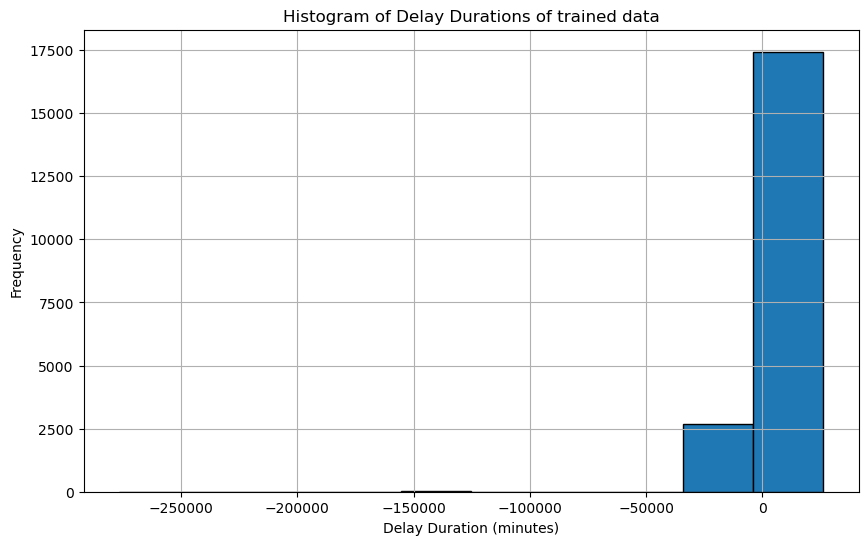

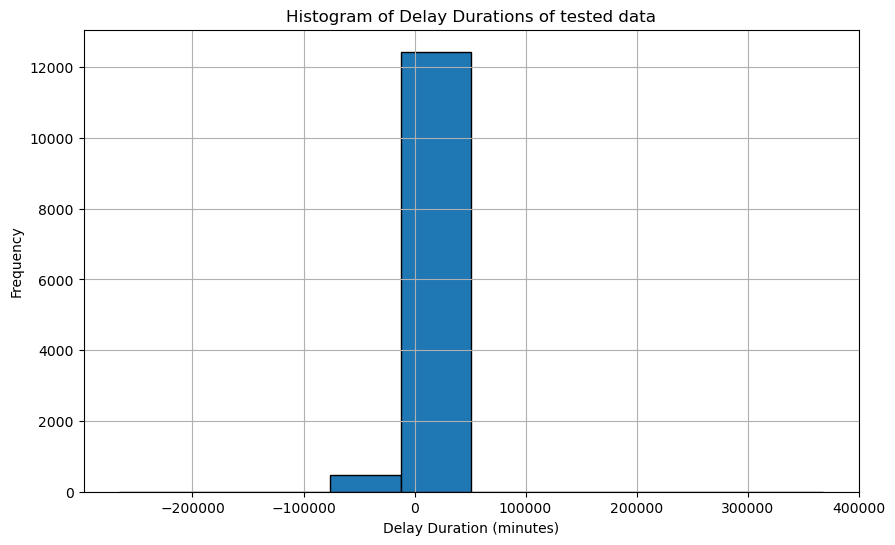

In [16]:
import matplotlib.pyplot as plt
df=trained
delay_durations = df['departure_delay']
plt.figure(figsize=(10, 6))
plt.hist(delay_durations.dropna(), bins=10, edgecolor='black')
plt.title('Histogram of Delay Durations of trained data')
plt.xlabel('Delay Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

df=tested
delay_durations = df['departure_delay']
plt.figure(figsize=(10, 6))
plt.hist(delay_durations.dropna(), bins=10, edgecolor='black')
plt.title('Histogram of Delay Durations of tested data')
plt.xlabel('Delay Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


part 2 making bar chart

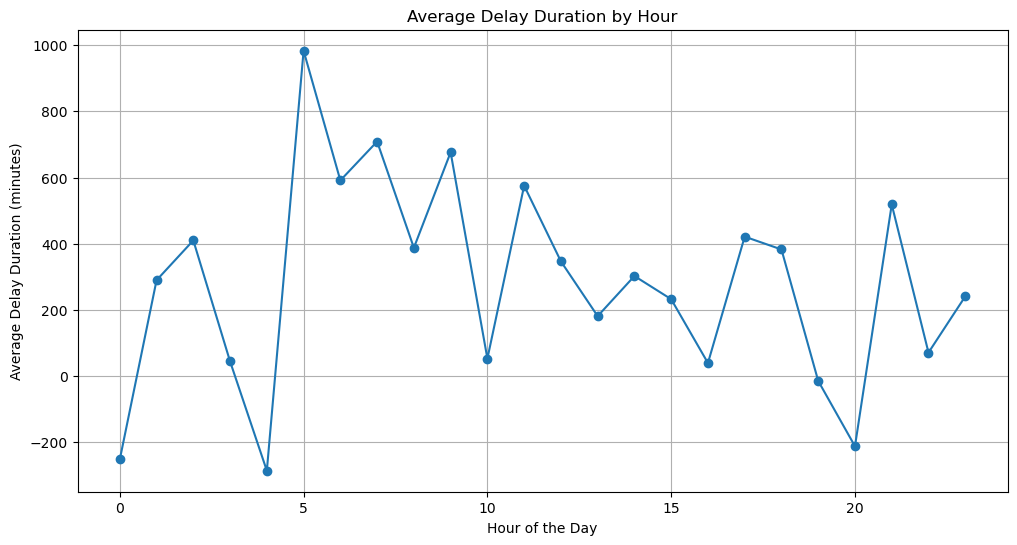

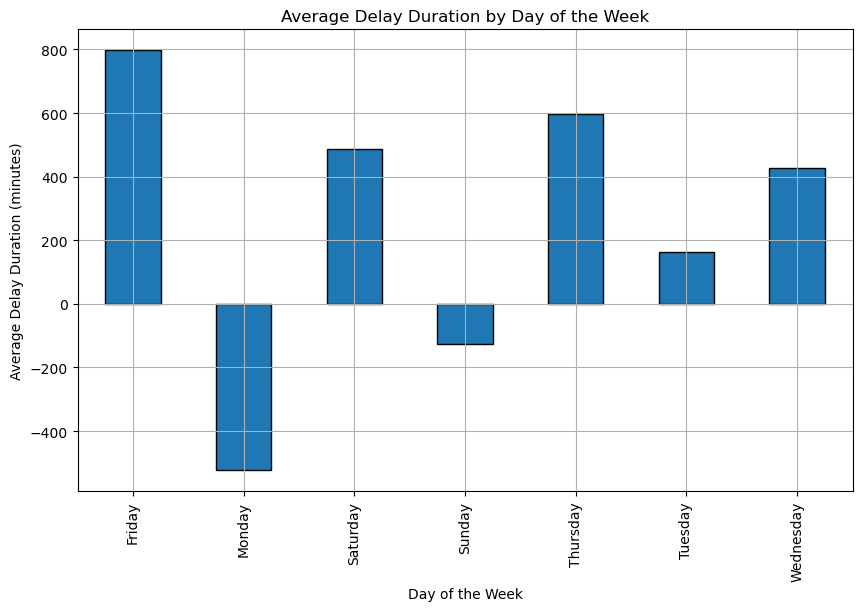

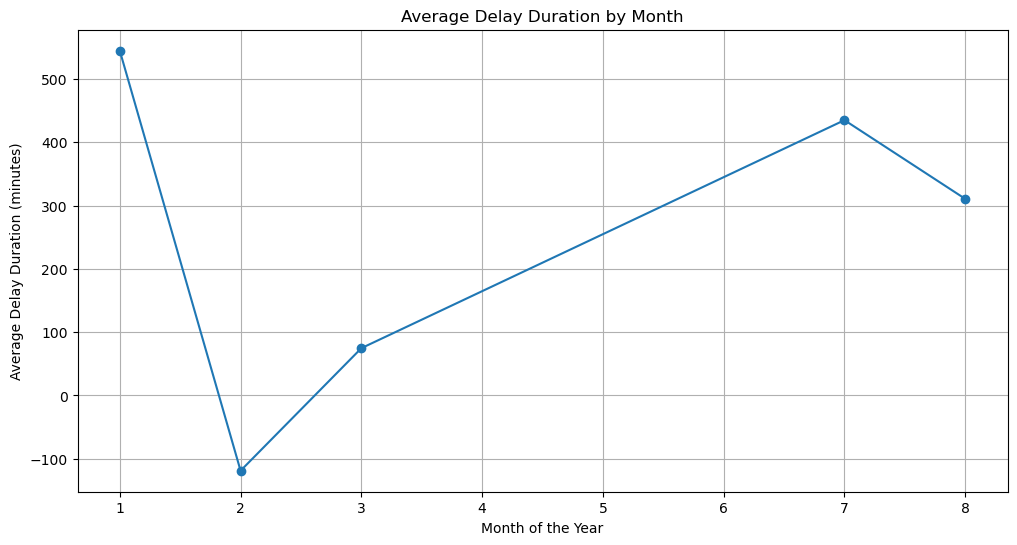

In [188]:
hourly_delays = trained.groupby('Hour_of_Day')['departure_delay'].mean()
plt.figure(figsize=(12, 6))
plt.plot(hourly_delays.index, hourly_delays.values, marker='o')
plt.title('Average Delay Duration by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Delay Duration (minutes)')
plt.grid(True)
plt.show()

daily_delays = trained.groupby('Day_of_Week')['departure_delay'].mean()
plt.figure(figsize=(10, 6))
daily_delays.plot(kind='bar', edgecolor='black')
plt.title('Average Delay Duration by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Delay Duration (minutes)')
plt.grid(True)
plt.show()

monthly_delays = trained.groupby('Month_of_Year')['departure_delay'].mean()
plt.figure(figsize=(12, 6))
plt.plot(monthly_delays.index, monthly_delays.values, marker='o')
plt.title('Average Delay Duration by Month')
plt.xlabel('Month of the Year')
plt.ylabel('Average Delay Duration (minutes)')
plt.grid(True)
plt.show()


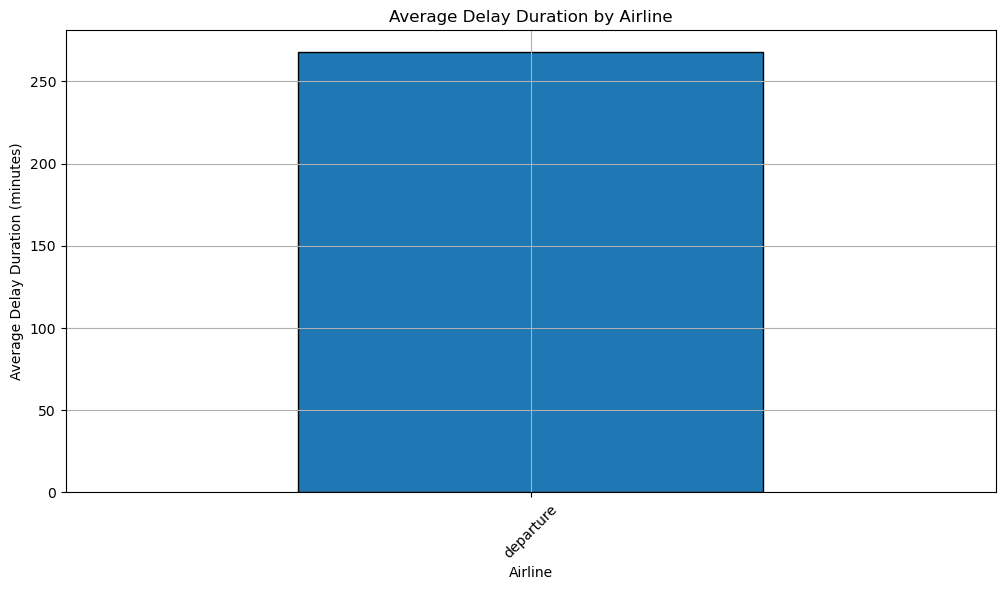

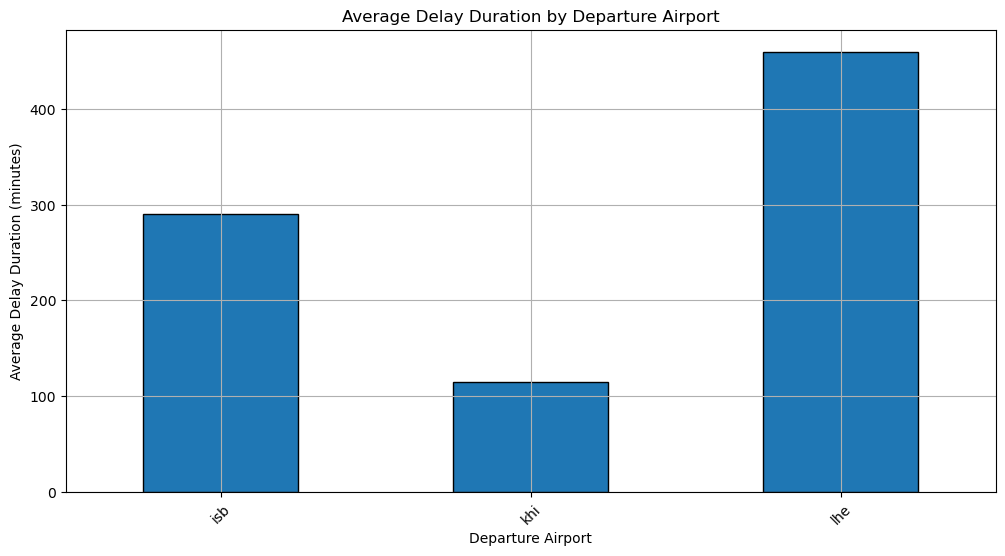

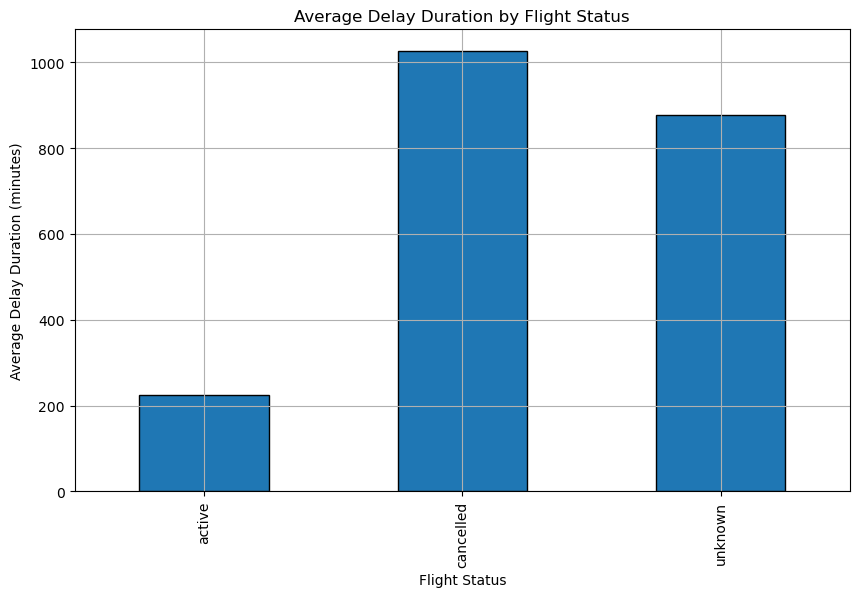

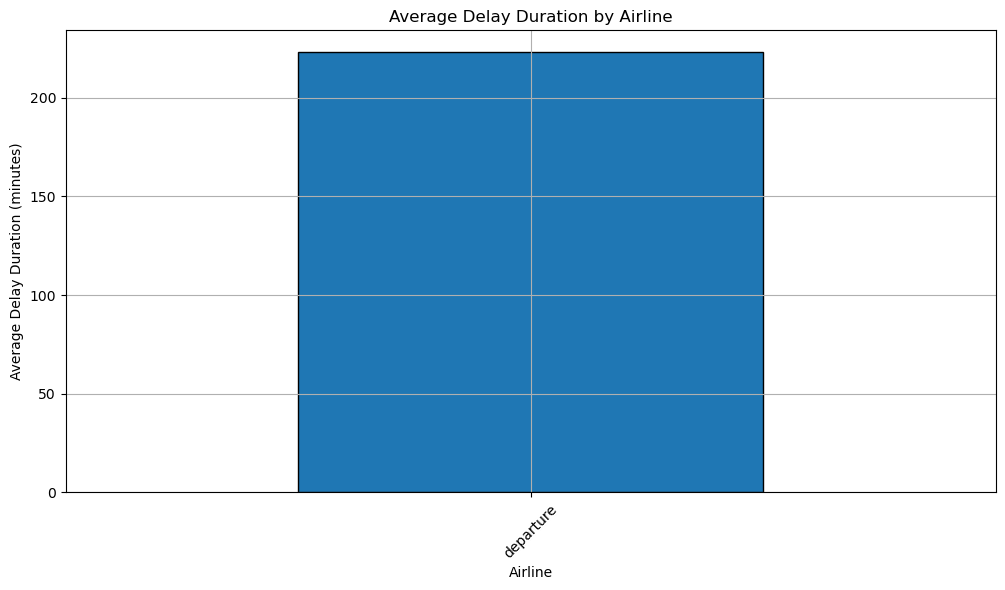

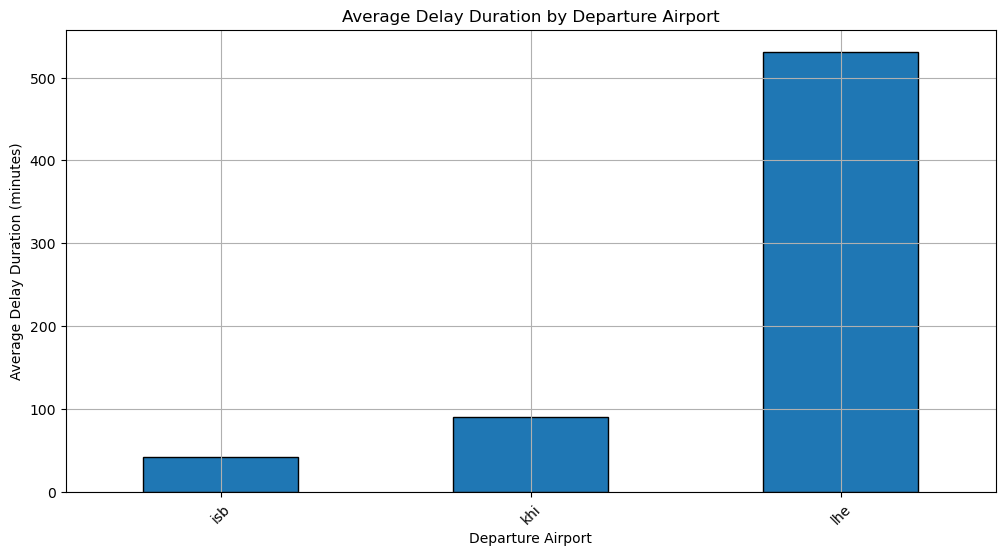

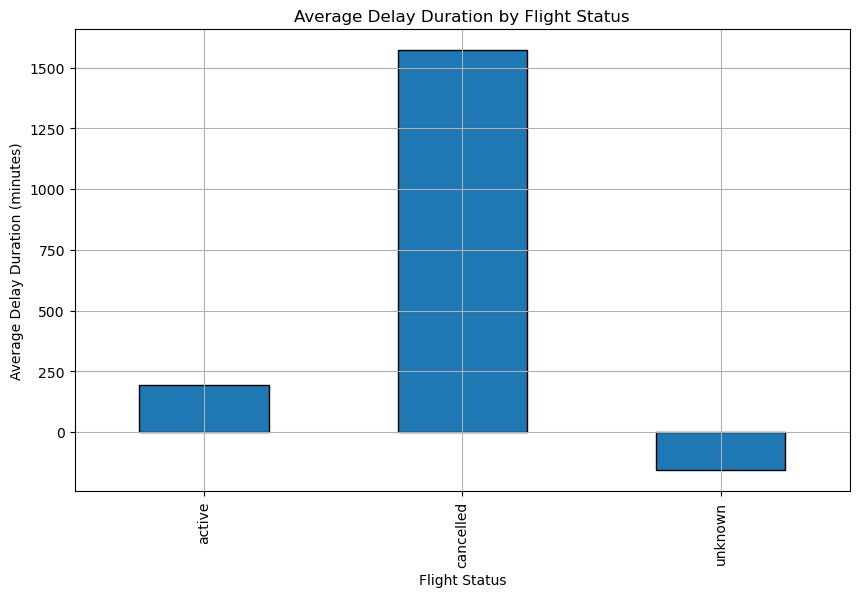

In [197]:
airline_delays = trained.groupby('type')['departure_delay'].mean()
plt.figure(figsize=(12, 6))
airline_delays.plot(kind='bar', edgecolor='black')
plt.title('Average Delay Duration by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Delay Duration (minutes)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

airport_delays = trained.groupby('departure.iataCode')['departure_delay'].mean()
plt.figure(figsize=(12, 6))
airport_delays.plot(kind='bar', edgecolor='black')
plt.title('Average Delay Duration by Departure Airport')
plt.xlabel('Departure Airport')
plt.ylabel('Average Delay Duration (minutes)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


status_delays = trained.groupby('status')['departure_delay'].mean()
plt.figure(figsize=(10, 6))
status_delays.plot(kind='bar', edgecolor='black')
plt.title('Average Delay Duration by Flight Status')
plt.xlabel('Flight Status')
plt.ylabel('Average Delay Duration (minutes)')
plt.grid(True)
plt.show()

####################################################################################################################
airline_delays = tested.groupby('type')['departure_delay'].mean()
plt.figure(figsize=(12, 6))
airline_delays.plot(kind='bar', edgecolor='black')
plt.title('Average Delay Duration by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Delay Duration (minutes)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

airport_delays = tested.groupby('departure.iataCode')['departure_delay'].mean()
plt.figure(figsize=(12, 6))
airport_delays.plot(kind='bar', edgecolor='black')
plt.title('Average Delay Duration by Departure Airport')
plt.xlabel('Departure Airport')
plt.ylabel('Average Delay Duration (minutes)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


status_delays = tested.groupby('status')['departure_delay'].mean()
plt.figure(figsize=(10, 6))
status_delays.plot(kind='bar', edgecolor='black')
plt.title('Average Delay Duration by Flight Status')
plt.xlabel('Flight Status')
plt.ylabel('Average Delay Duration (minutes)')
plt.grid(True)
plt.show()


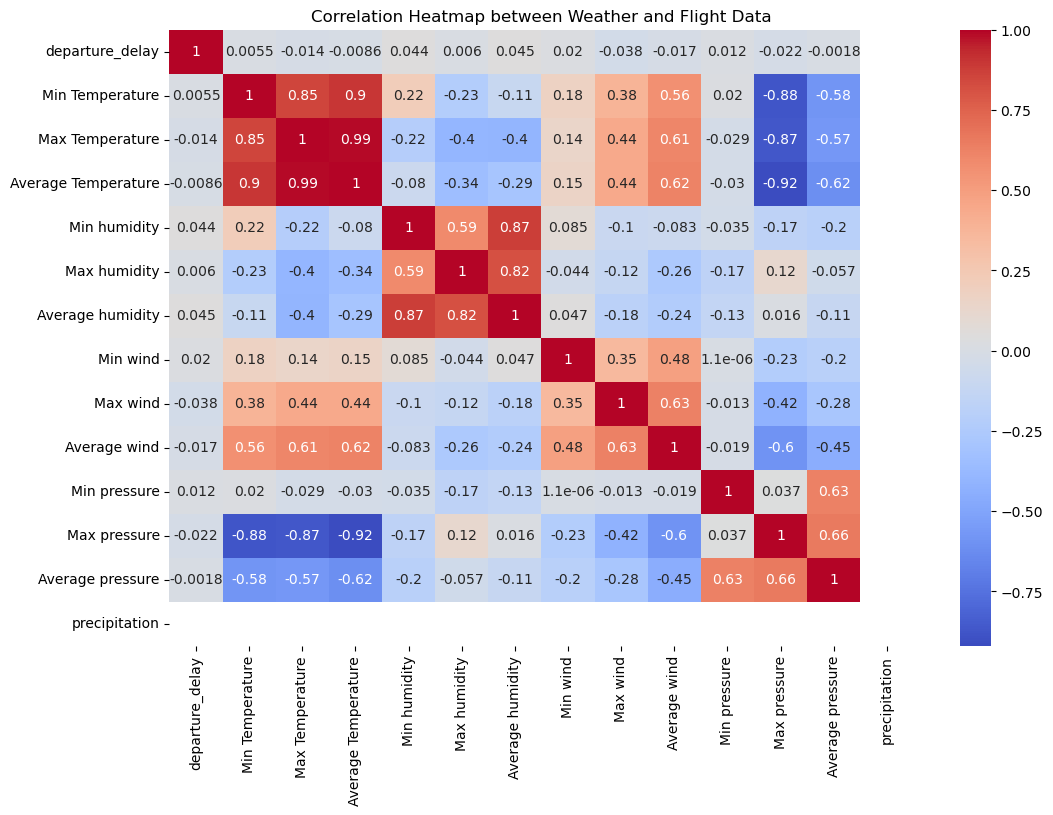

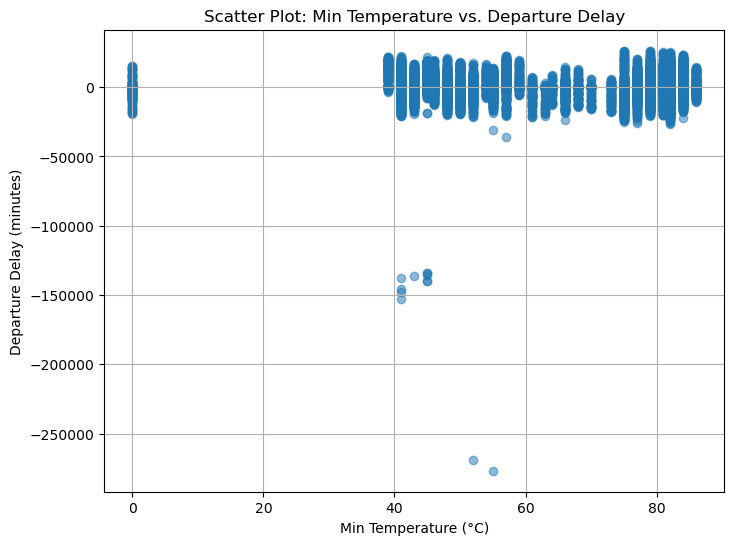

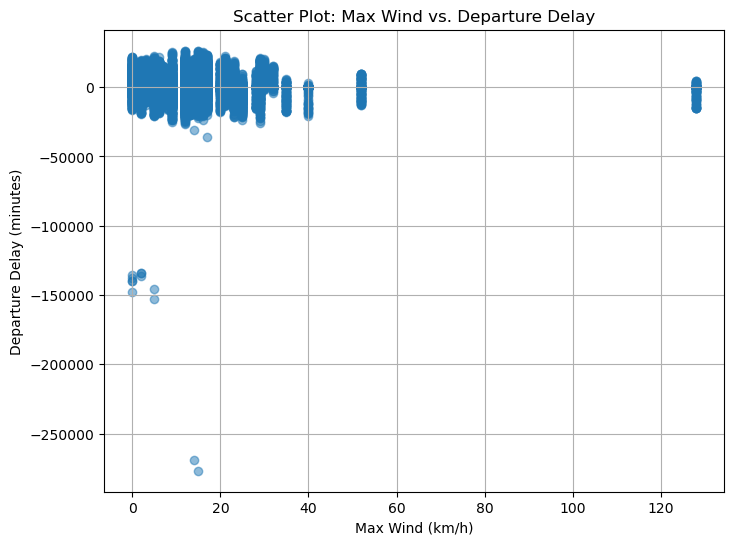

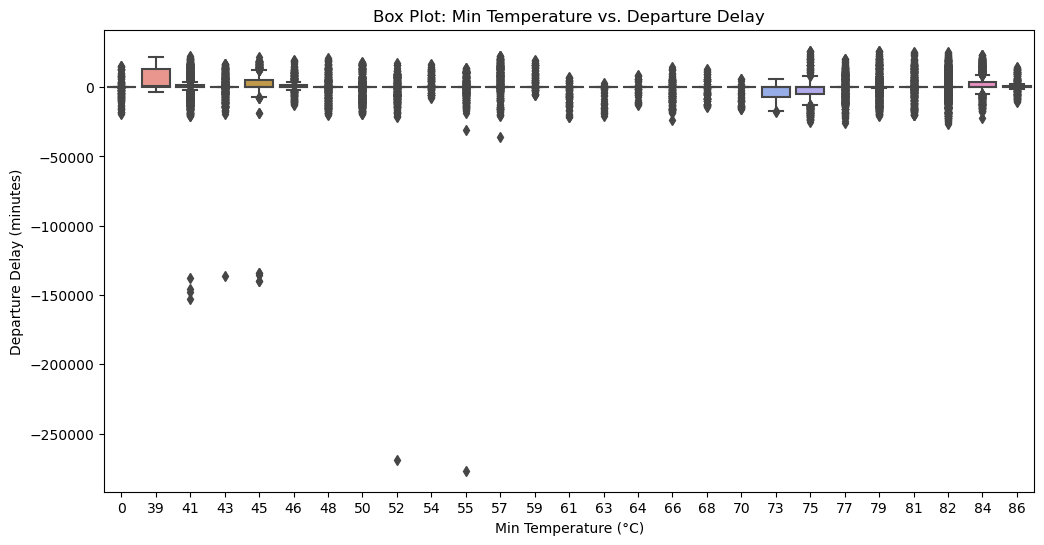

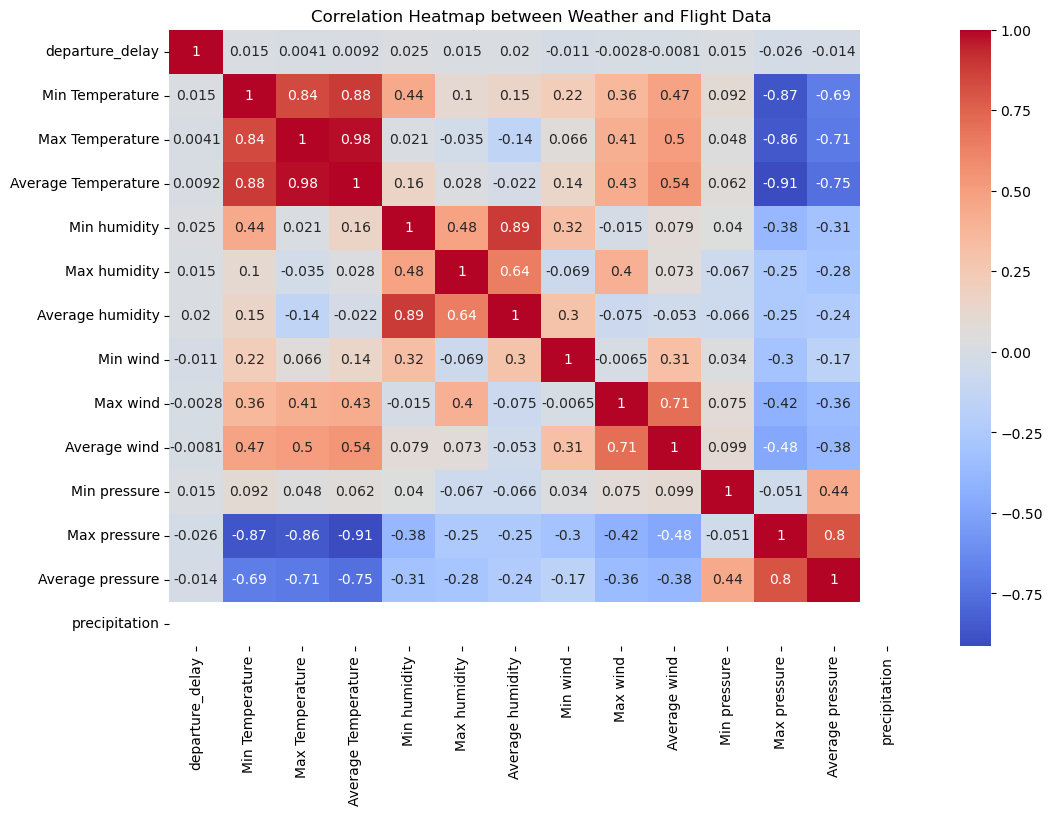

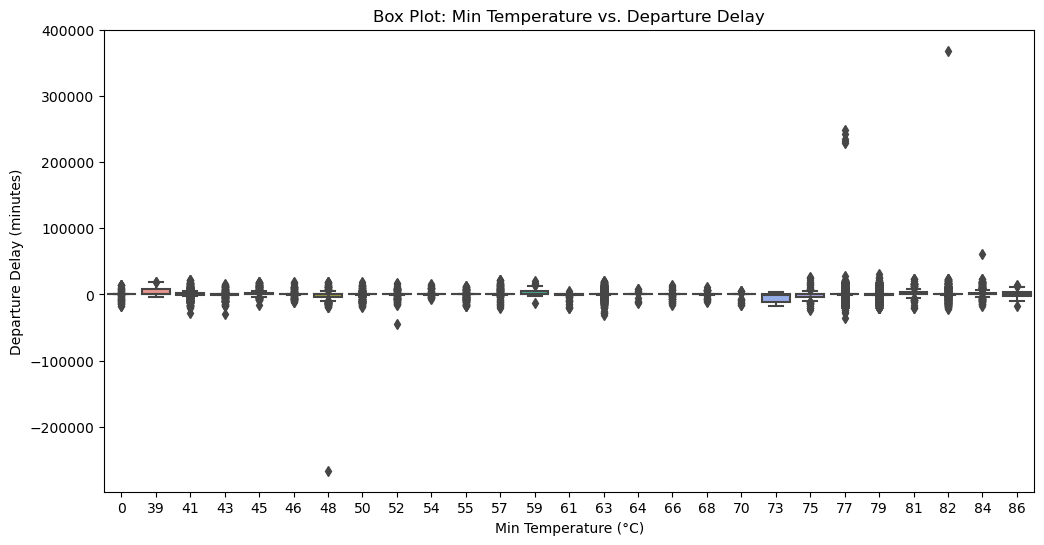

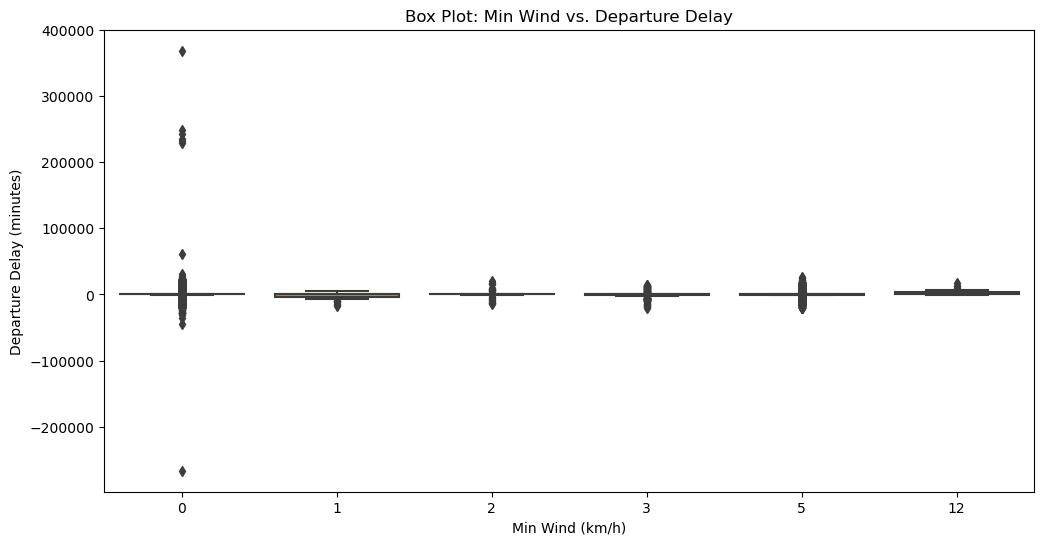

In [199]:

import seaborn as sns

correlation_matrix = trained[['departure_delay', 'Min Temperature', 'Max Temperature', 'Average Temperature',
                         'Min humidity', 'Max humidity', 'Average humidity', 'Min wind', 'Max wind',
                         'Average wind', 'Min pressure', 'Max pressure', 'Average pressure', 'precipitation']].corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap between Weather and Flight Data')
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(trained['Min Temperature'], trained['departure_delay'], alpha=0.5)
plt.title('Scatter Plot: Min Temperature vs. Departure Delay')
plt.xlabel('Min Temperature (°C)')
plt.ylabel('Departure Delay (minutes)')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(trained['Max wind'], trained['departure_delay'], alpha=0.5)
plt.title('Scatter Plot: Max Wind vs. Departure Delay')
plt.xlabel('Max Wind (km/h)')
plt.ylabel('Departure Delay (minutes)')
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(x='Min Temperature', y='departure_delay', data=trained)
plt.title('Box Plot: Min Temperature vs. Departure Delay')
plt.xlabel('Min Temperature (°C)')
plt.ylabel('Departure Delay (minutes)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Min wind', y='departure_delay', data=trained)
plt.title('Box Plot: Min Wind vs. Departure Delay')
plt.xlabel('Min Wind (km/h)')
plt.ylabel('Departure Delay (minutes)')
plt.show()
###############################################################################################################
correlation_matrix = tested[['departure_delay', 'Min Temperature', 'Max Temperature', 'Average Temperature',
                         'Min humidity', 'Max humidity', 'Average humidity', 'Min wind', 'Max wind',
                         'Average wind', 'Min pressure', 'Max pressure', 'Average pressure', 'precipitation']].corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap between Weather and Flight Data')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Min Temperature', y='departure_delay', data=tested)
plt.title('Box Plot: Min Temperature vs. Departure Delay')
plt.xlabel('Min Temperature (°C)')
plt.ylabel('Departure Delay (minutes)')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Min wind', y='departure_delay', data=tested)
plt.title('Box Plot: Min Wind vs. Departure Delay')
plt.xlabel('Min Wind (km/h)')
plt.ylabel('Departure Delay (minutes)')
plt.show()

# comparisons

In [201]:

train_stats = {
    'mean': trained['departure_delay'].mean(),
    'median': trained['departure_delay'].median(),
    'variance': trained['departure_delay'].var(),
}


test_stats = {
    'mean': tested['departure_delay'].mean(),
    'median': tested['departure_delay'].median(),
    'variance': tested['departure_delay'].var(),
}
# Comparison
consistency_check = {
    'mean_diff': abs(train_stats['mean'] - test_stats['mean']),
    'median_diff': abs(train_stats['median'] - test_stats['median']),
    'variance_diff': abs(train_stats['variance'] - test_stats['variance']),
}

consistency_check



{'mean_diff': 44.72169462743065,
 'median_diff': 2.0,
 'variance_diff': 16847183.809970282}

# 

# phase 3

# Binary Classification

In [1]:
import pandas as pd
folder_path = r"C:\Users\itsam\Downloads\ML-Proj-Dataset\ML-Proj-Dataset\finalltested.xlsx"
tested= pd.read_excel(folder_path) 
folder_path = r"C:\Users\itsam\Downloads\ML-Proj-Dataset\ML-Proj-Dataset\finalltrained.xlsx"
trained= pd.read_excel(folder_path)
df=trained

Accuracy: 0.7267614952034402
              precision    recall  f1-score   support

           0       0.53      0.13      0.20      1678
           1       0.74      0.96      0.84      4368

    accuracy                           0.73      6046
   macro avg       0.64      0.54      0.52      6046
weighted avg       0.68      0.73      0.66      6046



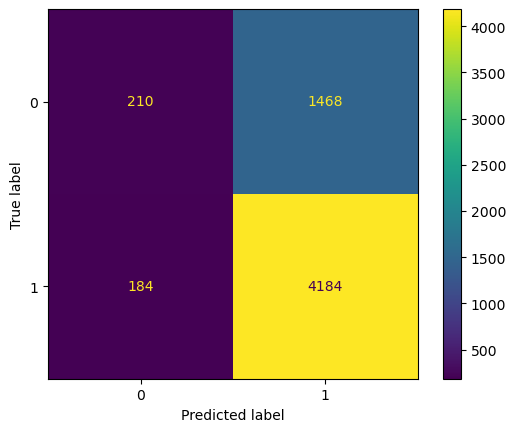

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split,GridSearchCV, KFold, cross_val_score
features = ['Min Temperature', 'Max Temperature', 'Average Temperature', 
            'Min Dew Point', 'Max Dew Point', 'Average Dew Point', 
            'Min humidity', 'Max humidity', 'Average humidity', 
            'Min wind', 'Max wind', 'Average wind', 
            'Min pressure', 'Max pressure', 'Average pressure', 
            'precipitation']
x= trained[features].copy()
y= trained['departure_delay'].apply(lambda x: 1 if x > 0 else 0)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
#X_test= tested[features].copy()
#y_test =tested['departure_delay'].apply(lambda x: 1 if x > 0 else 0)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

# Multi-Class Classification

Accuracy: 0.529606351306649
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.53      0.48      0.50      2939
           2       0.00      0.00      0.00        57
           3       0.53      0.61      0.56      2978

    accuracy                           0.53      6046
   macro avg       0.26      0.27      0.27      6046
weighted avg       0.52      0.53      0.52      6046



C:\Users\itsam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\itsam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\itsam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


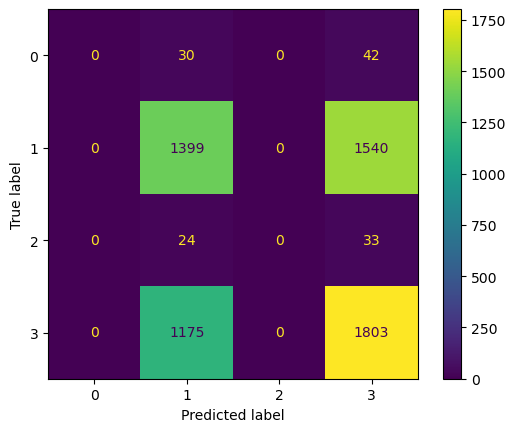

In [85]:
def categorize_delay(delay):
    if delay == 0:
        return 0  
    elif 0 < delay <= 45:
        return 1  
    elif 45 < delay <= 175:
        return 2 
    else:
        return 3 

trained['delay_category'] = trained['departure_delay'].apply(categorize_delay)
#tested['delay_category'] = tested['departure_delay'].apply(categorize_delay)
x = trained[features].copy()
y = trained['delay_category']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
#X_test= tested[features].copy()
#y_test =tested['departure_delay'].apply(categorize_delay)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

# Regression Analysis

In [ ]:
import pandas as pd
folder_path = r"C:\Users\itsam\Downloads\ML-Proj-Dataset\ML-Proj-Dataset\finalltested.xlsx"
tested= pd.read_excel(folder_path) 
folder_path = r"C:\Users\itsam\Downloads\ML-Proj-Dataset\ML-Proj-Dataset\finalltrained.xlsx"
trained= pd.read_excel(folder_path)
df=trained

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

x= trained[features].copy()
y = trained['departure_delay']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train, y_train)


cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_mae = -cv_scores.mean()
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Cross-Validation MAE: {cv_mae}")
print(f"Test Set MAE: {mae}")
print(f"Test Set RMSE: {rmse}")


Cross-Validation MAE: 3840.2770676120235
Test Set MAE: 3829.206732306418
Test Set RMSE: 7901.433902462825


# phase 4

In [90]:
folder_path = r"C:\Users\itsam\Downloads\ML-Proj-Dataset\ML-Proj-Dataset\finalltested.xlsx"
tested = pd.read_excel(folder_path)
folder_path = r"C:\Users\itsam\Downloads\ML-Proj-Dataset\ML-Proj-Dataset\finalltrained.xlsx"
trained = pd.read_excel(folder_path)

hyperparameters and kfolds of binary

In [81]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best parameters:", best_params)

model = RandomForestClassifier(**best_params, random_state=42)
model.fit(X_train, y_train)

C:\Users\itsam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
563 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\itsam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\itsam\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\itsam\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\itsam\anaconda3\Lib\site-packa

Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


RandomForestClassifier(max_depth=10, random_state=42)

In [83]:
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.73236441 0.72279334 0.71889401 0.71783056 0.72314782]
Mean accuracy: 0.7230060262318327


In [84]:
y_pred = model.predict(X_test)
binary=accuracy_score(y_test, y_pred)
print("Accuracy:",binary )

Accuracy: 0.7269268938140919


hyperamaaters and kfolds for multi

In [86]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
model = RandomForestClassifier(**best_params, random_state=42)
model.fit(X_train, y_train)


C:\Users\itsam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\itsam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\itsam\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\itsam\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\itsam\anaconda3\Lib\site-packa

RandomForestClassifier(max_depth=10, random_state=42)

In [89]:
print("Best parameters:", best_params)

Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [87]:
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.53739809 0.53137185 0.54555122 0.52924495 0.53385324]
Mean accuracy: 0.5354838709677419


In [88]:
y_pred = model.predict(X_test)
multi=accuracy_score(y_test, y_pred)
print("Accuracy:",multi)

Accuracy: 0.5266291763149189


hyperamaaters and kfolds for linear regressin

In [95]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
param_grid = {'alpha': [0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_cv_mae = -grid_search.best_score_
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Best Parameters: {'alpha': 1000}


In [96]:
y_pred_tuned = best_model.predict(X_test)
tuned_mae = mean_absolute_error(y_test, y_pred_tuned)
tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tuned))

print(f"Best Model Cross-Validation MAE: {best_cv_mae}")
print(f"Tuned Model Test Set MAE: {tuned_mae}")
print(f"Tuned Model Test Set RMSE: {tuned_rmse}")

Best Model Cross-Validation MAE: 3736.669024775513
Tuned Model Test Set MAE: 3734.852044595038
Tuned Model Test Set RMSE: 7916.757122210652


In [97]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_mae = -cv_scores.mean()

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate predictions
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Cross-Validation MAE: {cv_mae}")
print(f"Test Set MAE: {mae}")
print(f"Test Set RMSE: {rmse}")

Cross-Validation MAE: 3840.2770676120235
Test Set MAE: 3829.206732306418
Test Set RMSE: 7901.433902462825


comaprsion of models

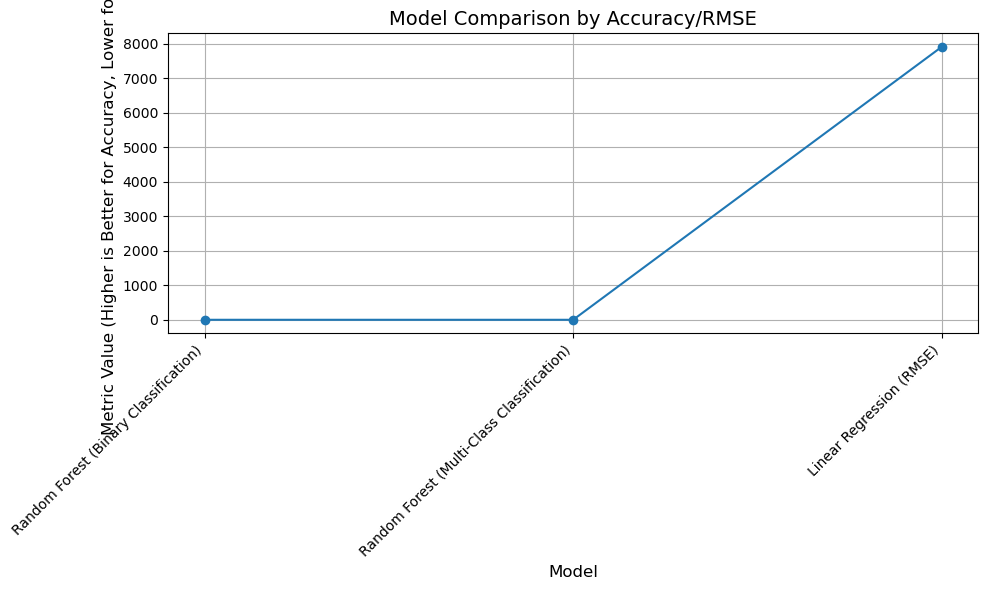

{'Random Forest (Binary Classification)': 0.7269268938140919,
 'Random Forest (Multi-Class Classification)': 0.5266291763149189,
 'Linear Regression (RMSE)': 7901.433902462825}

In [102]:
import numpy as np
import matplotlib.pyplot as plt

# Metrics for the models
metrics = {
    "Random Forest (Binary Classification)": binary,
    "Random Forest (Multi-Class Classification)":multi,  
    "Linear Regression (RMSE)": rmse
}

# Convert to DataFrame for easier handling (optional)
import pandas as pd
metrics_df = pd.DataFrame.from_dict(metrics, orient='index', columns=['Metric'])
metrics_df.reset_index(inplace=True)
metrics_df.columns = ['Model', 'Metric']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(metrics_df['Model'], metrics_df['Metric'], marker='o', linestyle='-')
plt.title("Model Comparison by Accuracy/RMSE", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Metric Value (Higher is Better for Accuracy, Lower for RMSE)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()
metrics

# phase 5

In [6]:
import pandas as pd
folder_path = r"C:\Users\itsam\Downloads\ML-Proj-Dataset\ML-Proj-Dataset\finalltested.xlsx"
tested= pd.read_excel(folder_path) 
folder_path = r"C:\Users\itsam\Downloads\ML-Proj-Dataset\ML-Proj-Dataset\finalltrained.xlsx"
trained= pd.read_excel(folder_path)
df=trained

Accuracy: 0.6957565432863559
              precision    recall  f1-score   support

           0       0.48      0.03      0.07      3915
           1       0.70      0.98      0.82      8999

    accuracy                           0.70     12914
   macro avg       0.59      0.51      0.44     12914
weighted avg       0.63      0.70      0.59     12914



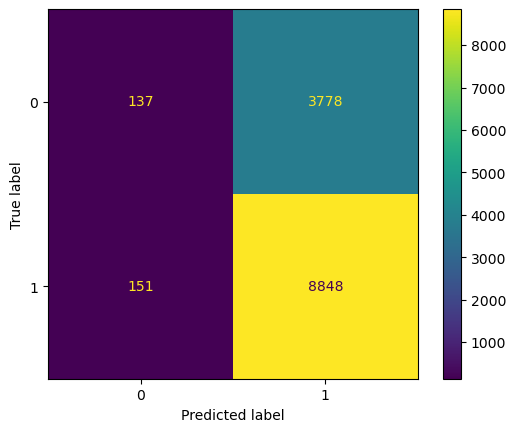

In [5]:
features = ['Min Temperature', 'Max Temperature', 'Average Temperature', 
            'Min Dew Point', 'Max Dew Point', 'Average Dew Point', 
            'Min humidity', 'Max humidity', 'Average humidity', 
            'Min wind', 'Max wind', 'Average wind', 
            'Min pressure', 'Max pressure', 'Average pressure', 
            'precipitation']
x= trained[features].copy()
y= trained['departure_delay'].apply(lambda x: 1 if x > 0 else 0)

model = RandomForestClassifier(random_state=42)
model.fit(x,y)


X_test= tested[features].copy()
y_test =tested['departure_delay'].apply(lambda x: 1 if x > 0 else 0)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

submission = pd.DataFrame({
    'ID': tested.index, 
    'delay': ['delayed' if pred == 1 else 'on-time' for pred in y_pred]
})

In [4]:
submission.to_csv('submission.csv', index=False)

print("Submission file saved as 'submission.csv'")


Submission file saved as 'submission.csv'


Accuracy: 0.5181198699086264
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       152
           1       0.50      0.68      0.58      6182
           2       0.00      0.00      0.00       118
           3       0.55      0.39      0.45      6462

    accuracy                           0.52     12914
   macro avg       0.26      0.27      0.26     12914
weighted avg       0.51      0.52      0.50     12914



C:\Users\itsam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\itsam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\itsam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


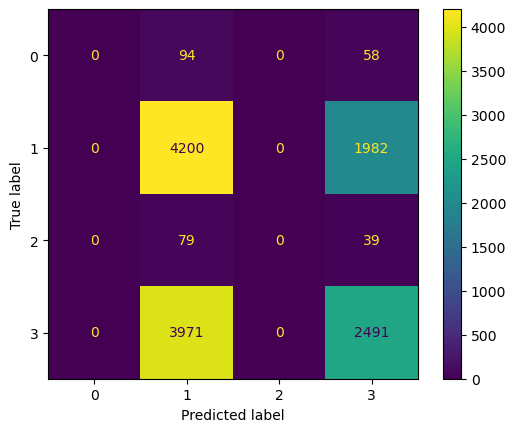

In [8]:
def categorize_delay(delay):
    if delay == 0:
        return 0  
    elif 0 < delay <= 45:
        return 1  
    elif 45 < delay <= 175:
        return 2 
    else:
        return 3 

trained['delay_category'] = trained['departure_delay'].apply(categorize_delay)
tested['delay_category'] = tested['departure_delay'].apply(categorize_delay)
x = trained[features].copy()
y = trained['delay_category']

model = RandomForestClassifier(random_state=42)
model.fit(x,y)


X_test= tested[features].copy()
y_test =tested['departure_delay'].apply(categorize_delay)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
submission = pd.DataFrame({
    'ID': range(1, len(tested) + 1),
    'delay': ['delayed' if pred == 1 else 'on-time' for pred in y_pred]
})

In [9]:
submission.to_csv('submission1.csv', index=False)

print("Submission file saved as 'submission.csv'")


Submission file saved as 'submission.csv'


In [11]:

X = trained[features].copy()
y = trained['departure_delay']

X_test = tested[features].copy()
y_test = tested['departure_delay']  


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X) 
X_test_scaled = scaler.transform(X_test)


model = LinearRegression()
model.fit(X_train_scaled, y)

cv_scores = cross_val_score(model, X_train_scaled, y, cv=5, scoring='neg_mean_absolute_error')
cv_mae = -cv_scores.mean()


y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Cross-Validation MAE: {cv_mae}")
print(f"Test Set MAE: {mae}")
print(f"Test Set RMSE: {rmse}")


Cross-Validation MAE: 4368.03219656961
Test Set MAE: 3776.8056456206064
Test Set RMSE: 8620.092851168141


In [13]:
submission = pd.DataFrame({
    'ID': range(1, len(tested) + 1),
    'delay': y_pred
})

In [14]:
submission.to_csv('submission2.csv', index=False)

print("Submission file saved as 'submission.csv'")


Submission file saved as 'submission.csv'
